# Gestión de Datos

Taller 1 
Univerisdad Javeriana  
August, 2022  
  
Datasets:   

1. Lesiones Personales
2. Violencia Intrafamiliar
3. Delitos Sexuales
4. Homicidios

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Desarrollo de Taller

#Punto 1

R/ Para el desarrollo de este taller se escogen los siguientes dataframes: Lesiones Personales, Violencia Intrafamiliar, Delitos Sexuales y Homicidios Accidente de Transito. 

Para cada uno de estos data frames se tienen en su gran mayoría variables categoricas nominales y ordinales con la unica excepción de la 'CANTIDAD' la cual es la cantidad de delitos realizados (Variable escalar)

De igual manera se revisan cada uno de los campos tratando de identificar datos anomalos. Para estos se crean diccionarios especificos con el objetivo de reemplzar dichos valores. Para los datos nulos se reportan como "NO REPORTADO". 

Por ultimo, se estandariza el formato de la fecha. 

##Diccionarios

In [6]:
#Diccionario para poder modificar lo que sea no responde o sinonimos. 
estandarizar_dic = {
    "NO REPORTA": "NO REPORTA", 
    "-": "NO REPORTA",
    "NO REPORTADO":"NO REPORTA",
    "ADOLECENTES":"ADOLESCENTES"
}

estandarizar_dic

{'NO REPORTA': 'NO REPORTA',
 '-': 'NO REPORTA',
 'NO REPORTADO': 'NO REPORTA',
 'ADOLECENTES': 'ADOLESCENTES'}

In [3]:
#Diccionario para poder modificar departamenteos erroneos. 
estandarizar_dep = {
    "SAN ANDRÉS": "SAN ANDRÉS Y PROVIDENCIA",
    "Antioquia": "ANTIOQUIA",
    "Atlántico": "ATLÁNTICO", 
    "Bogotá, D.C.": "CUNDINAMARCA", 
    "Bolívar": "BOLÍVAR", 
    "Valle del Cauca": "VALLE DEL CAUCA",
    "ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA": "SAN ANDRÉS Y PROVIDENCIA",
    "LA GUAJIRA": "GUAJIRA"
}

estandarizar_dep

{'SAN ANDRÉS': 'SAN ANDRÉS Y PROVIDENCIA',
 'Antioquia': 'ANTIOQUIA',
 'Atlántico': 'ATLÁNTICO',
 'Bogotá, D.C.': 'CUNDINAMARCA',
 'Bolívar': 'BOLÍVAR',
 'Valle del Cauca': 'VALLE DEL CAUCA',
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA': 'SAN ANDRÉS Y PROVIDENCIA',
 'LA GUAJIRA': 'GUAJIRA'}

In [7]:
#Diccionario para poder modificar municipios erroneos. 
estandarizar_mun = {
    "Medellín": "MEDELLÍN (CT)",
    "Barranquilla": "BARRANQUILLA (CT)",
    "Bogotá, D.C.": "BOGOTÁ D.C. (CT)", 
    "Cartagena de Indias": "CARTAGENA (CT)", 
    "Cali": "CALI (CT)"
}

estandarizar_mun

{'Medellín': 'MEDELLÍN (CT)',
 'Barranquilla': 'BARRANQUILLA (CT)',
 'Bogotá, D.C.': 'BOGOTÁ D.C. (CT)',
 'Cartagena de Indias': 'CARTAGENA (CT)',
 'Cali': 'CALI (CT)'}

## Carga de Base de Datos

In [8]:
#Cargue de la base de datos de lesiones personales
ls_df = pd.read_csv('data/lesiones_personales.csv', sep = ",")
ls_df = ls_df.drop_duplicates()

In [9]:
#Cargue de la base de datos de lesiones personales
vi_df = pd.read_csv('data/Violencia_intrafamiliar.csv', sep = ",")
vi_df = vi_df.drop_duplicates()

In [10]:
#Cargue de la base de datos de lesiones personales
ds_df = pd.read_csv('data/Delitos_sexuales.csv', sep = ",", dtype = {"CODIGO DANE" : "object"})
ds_df = ds_df.drop_duplicates()

In [11]:
#Cargue de la base de datos de lesiones personales
hat_df = pd.read_csv('data/Homicidios.csv', sep = ",", dtype = {"CODIGO DANE" : "object"})
hat_df = hat_df.drop_duplicates()

In [12]:
#Carga de Base de Datos poblacional para el punto 3
poblacion_df = pd.read_csv('data/poblacion_colombia_2018.csv',sep=";",header= 0)

In [13]:
#Cargue de la base de datos de proyección de poblaciones
proy_pob_all_df = pd.read_excel('data/proyecciones-poblacion-Municipal.xlsx')

## DB Lesiones personales

###General

In [14]:
#Primeras5 filas del df
ls_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2


In [15]:
#Dimension del df
ls_df.shape

(996310, 9)

In [16]:
#Información General del df
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996310 entries, 0 to 1032880
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DEPARTAMENTO          996310 non-null  object
 1   MUNICIPIO             996310 non-null  object
 2   CODIGO DANE           996310 non-null  object
 3   ARMAS MEDIOS          996310 non-null  object
 4   FECHA HECHO           996310 non-null  object
 5   GENERO                996310 non-null  object
 6   GRUPO ETARIO          995524 non-null  object
 7   DESCRIPCIÓN CONDUCTA  996310 non-null  object
 8   CANTIDAD              996310 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 76.0+ MB


In [17]:
ls_df.isnull().any()

DEPARTAMENTO            False
MUNICIPIO               False
CODIGO DANE             False
ARMAS MEDIOS            False
FECHA HECHO             False
GENERO                  False
GRUPO ETARIO             True
DESCRIPCIÓN CONDUCTA    False
CANTIDAD                False
dtype: bool

###Analyzing Data Quality

In [18]:
# Analyzing unique values for column DEPARTAMENTO
ls_df['DEPARTAMENTO'].unique()

array(['ANTIOQUIA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ',
       'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'CUNDINAMARCA', 'GUAJIRA',
       'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO', 'PUTUMAYO',
       'QUINDÍO', 'RISARALDA', 'SAN ANDRÉS', 'SANTANDER', 'SUCRE',
       'TOLIMA', 'VALLE', 'AMAZONAS', 'ARAUCA', 'CASANARE',
       'NORTE DE SANTANDER', 'VAUPÉS', 'GUAINÍA', 'VICHADA'], dtype=object)

In [19]:
# Creating a dictionary representing the valid departments for Colombia
departments_list = ['ANTIOQUIA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ',
       'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'META',
       'CUNDINAMARCA', 'HUILA', 'MAGDALENA', 'NARIÑO', 'PUTUMAYO',
       'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'NORTE DE SANTANDER', 'GUAJIRA', 'QUINDÍO', 'SAN ANDRÉS Y PROVIDENCIA', 'ARAUCA',
       'GUAINÍA', 'VICHADA', 'VAUPÉS', 'GUAVIARE', 'AMAZONAS']
departments_list

['ANTIOQUIA',
 'ATLÁNTICO',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CÓRDOBA',
 'META',
 'CUNDINAMARCA',
 'HUILA',
 'MAGDALENA',
 'NARIÑO',
 'PUTUMAYO',
 'RISARALDA',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'NORTE DE SANTANDER',
 'GUAJIRA',
 'QUINDÍO',
 'SAN ANDRÉS Y PROVIDENCIA',
 'ARAUCA',
 'GUAINÍA',
 'VICHADA',
 'VAUPÉS',
 'GUAVIARE',
 'AMAZONAS']

In [20]:
#Checkeo de palabras que no se encuentren correctamente escritas
ls_df.loc[~ls_df["DEPARTAMENTO"].isin(departments_list), "DEPARTAMENTO"].unique()

array(['SAN ANDRÉS'], dtype=object)

In [21]:
#Reemplazar departamentos mal escritos. (Checkear primero si hay alguno adicioanl en los otros df y añadirlo a los diccionarios arriba.)
ls_df.replace({"DEPARTAMENTO":estandarizar_dep}, inplace = True)

In [22]:
# Analyzing unique values for column MUNICIPIO
ls_df.replace({"MUNICIPIO":estandarizar_dic}, inplace = True)
ls_df['MUNICIPIO'].unique()

array(['GIRARDOTA', 'MUTATÁ', 'NECOCLÍ', ..., 'ALTO BAUDÓ', 'NO REPORTA',
       'MURINDÓ'], dtype=object)

In [23]:
# Analyzing unique values for column CODIGO DANE
ls_df['CODIGO DANE'].unique()

array([5308000, 5480000, 5490000, ..., '27425000', '27430000', '27580000'],
      dtype=object)

In [24]:
# Analyzing unique values for column ARMAS MEDIOS
ls_df.replace({"ARMAS MEDIOS":estandarizar_dic}, inplace = True)
ls_df['ARMAS MEDIOS'].unique()

#Se podria llegar a homologar los valores para queden en categorias mas grandes

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'MOTO', 'NO REPORTA', 'POLVORA(FUEGOS PIROTECNICOS)', 'PUNZANTES',
       'VEHICULO', 'COMBUSTIBLE', 'JERINGA', 'PERRO', 'BICICLETA',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'MINA ANTIPERSONA',
       'SUSTANCIAS TOXICAS', 'SIN EMPLEO DE ARMAS', 'AGUA CALIENTE',
       'ESCOPOLAMINA', 'OLLA BOMBA', 'GRANADA DE MANO', 'PAQUETE BOMBA',
       'MEDICAMENTOS', 'VENENO', 'QUIMICOS', 'CARRO BOMBA', 'GASES',
       'CINTAS/CINTURON', 'ARTEFACTO INCENDIARIO', 'PAPA EXPLOSIVA',
       'ALIMENTOS VENCIDOS', 'LICOR ADULTERADO', 'ACIDO', 'ALUCINOGENOS',
       'ALMOHADA', 'BOLSA PLASTICA', 'CORTANTES', 'CUCHILLA', 'DIRECTA',
       'ARMAS BLANCAS', 'PRENDAS DE VESTIR', 'CILINDRO BOMBA',
       'CINTURON BOMBA', 'ARMA TRAUMATICA'], dtype=object)

In [25]:
# Creating a lambda expression for datetime parsing
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [26]:
# Analyzing unique values for column FECHA HECHO
ls_df['FECHA HECHO']=ls_df['FECHA HECHO'].apply(dateparse)

In [27]:
# Analyzing unique values for column GENERO
ls_df.replace({"GENERO":estandarizar_dic}, inplace = True)

ls_df['GENERO'].unique()

array(['FEMENINO', 'MASCULINO', 'NO REPORTA'], dtype=object)

In [28]:
# Analyzing unique values for column GRUPO ETARIO
ls_df.replace({"GRUPO ETARIO":estandarizar_dic}, inplace = True)

#Reemplazar valores nulos con NO REPORTA
ls_df['GRUPO ETARIO'].fillna('NO REPORTA',inplace = True)

ls_df['GRUPO ETARIO'].unique()


array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA'], dtype=object)

In [29]:
# Analyzing unique values for column DESCRIPCION CONDUCTA
ls_df["DESCRIPCIÓN CONDUCTA"].unique()

array(['LESIONES PERSONALES',
       'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )'], dtype=object)

In [30]:
# Analyzing unique values for column CANTIDAD
ls_df['CANTIDAD'].unique()

array([  2,   1,   5,   3,   4,   7,  29,  12,   6,   9,  22,  25,   8,
        30,  15,  13,  10,  18,  11,  16,  24,  28,  17,  14,  27,  20,
        19,  23,  26,  35,  21,  42,  65,  76,  38,  52,  31,  32,  39,
        36,  49,  41,  51,  66,  34,  71,  62,  46,  37,  53,  61,  33,
        40,  54,  63,  44,  70,  45,  86,  47,  43,  48,  67,  55,  69,
        80,  50,  60,  73,  64,  79,  56,  99,  78,  88,  59,  77,  57,
        72,  58,  82,  84, 114,  97,  75,  92], dtype=int64)

In [31]:
#Crear columnas año y mes
ls_df['year'] = pd.DatetimeIndex(ls_df['FECHA HECHO']).year 
ls_df['month'] = pd.DatetimeIndex(ls_df['FECHA HECHO']).month

## DB Violencia Intrafamiliar

###General

In [32]:
#Primeras5 filas del df
vi_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [33]:
#Dimension del df
vi_df.shape

(482004, 8)

In [34]:
#Información General del df
vi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482004 entries, 0 to 528879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  482004 non-null  object
 1   MUNICIPIO     482004 non-null  object
 2   CODIGO DANE   482004 non-null  object
 3   ARMAS MEDIOS  482004 non-null  object
 4   FECHA HECHO   482004 non-null  object
 5   GENERO        482004 non-null  object
 6   GRUPO ETARIO  480669 non-null  object
 7   CANTIDAD      482004 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 33.1+ MB


In [35]:
#Checkeo que columnas tienen nulos
vi_df.isnull().any()

DEPARTAMENTO    False
MUNICIPIO       False
CODIGO DANE     False
ARMAS MEDIOS    False
FECHA HECHO     False
GENERO          False
GRUPO ETARIO     True
CANTIDAD        False
dtype: bool

###Analyzing Data Quality

In [36]:
# Analyzing unique values for column DEPARTAMENTO
vi_df['DEPARTAMENTO'].unique()

array(['ATLÁNTICO', 'BOYACÁ', 'CAQUETÁ', 'CASANARE', 'CUNDINAMARCA',
       'SUCRE', 'VALLE', 'HUILA', 'ANTIOQUIA', 'ARAUCA', 'BOLÍVAR',
       'CALDAS', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'MAGDALENA',
       'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'RISARALDA',
       'SANTANDER', 'TOLIMA', 'VAUPÉS', 'GUAVIARE', 'GUAJIRA', 'QUINDÍO',
       'AMAZONAS', 'VICHADA', 'GUAINÍA', 'SAN ANDRÉS', 'NO REPORTA'],
      dtype=object)

In [37]:
# Creating a dictionary representing the valid departments for Colombia
departments_list = ['ANTIOQUIA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ',
       'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'META',
       'CUNDINAMARCA', 'HUILA', 'MAGDALENA', 'NARIÑO', 'PUTUMAYO',
       'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'NORTE DE SANTANDER', 'GUAJIRA', 'QUINDÍO', 'SAN ANDRÉS Y PROVIDENCIA', 'ARAUCA',
       'GUAINÍA', 'VICHADA', 'VAUPÉS', 'GUAVIARE', 'AMAZONAS']
departments_list

['ANTIOQUIA',
 'ATLÁNTICO',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CÓRDOBA',
 'META',
 'CUNDINAMARCA',
 'HUILA',
 'MAGDALENA',
 'NARIÑO',
 'PUTUMAYO',
 'RISARALDA',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'NORTE DE SANTANDER',
 'GUAJIRA',
 'QUINDÍO',
 'SAN ANDRÉS Y PROVIDENCIA',
 'ARAUCA',
 'GUAINÍA',
 'VICHADA',
 'VAUPÉS',
 'GUAVIARE',
 'AMAZONAS']

In [38]:
#Checkeo de palabras que no se encuentren correctamente escritas
vi_df.loc[~vi_df["DEPARTAMENTO"].isin(departments_list), "DEPARTAMENTO"].unique()

array(['SAN ANDRÉS', 'NO REPORTA'], dtype=object)

In [39]:
#Reemplazar departamentos mal escritos. (Checkear primero si hay alguno adicioanl en los otros df y añadirlo a los diccionarios arriba.)
vi_df.replace({"DEPARTAMENTO":estandarizar_dep}, inplace = True)

In [40]:
# Analyzing unique values for column MUNICIPIO
vi_df.replace({"MUNICIPIO":estandarizar_dic}, inplace = True)
vi_df['MUNICIPIO'].unique()

array(['BARRANQUILLA (CT)', 'DUITAMA', 'PUERTO RICO', ..., 'CEPITÁ',
       'RÍO QUITO', 'NOROSÍ'], dtype=object)

In [41]:
# Analyzing unique values for column CODIGO DANE
ls_df['CODIGO DANE'].unique()

array([5308000, 5480000, 5490000, ..., '27425000', '27430000', '27580000'],
      dtype=object)

In [42]:
# Analyzing unique values for column ARMAS MEDIOS
vi_df.replace({"ARMAS MEDIOS":estandarizar_dic}, inplace = True)
vi_df['ARMAS MEDIOS'].unique()

#Se podria llegar a homologar los valores para queden en categorias mas grandes

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTA', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'ESCOPOLAMINA'], dtype=object)

In [43]:
# Creating a lambda expression for datetime parsing
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [44]:
# Analyzing unique values for column FECHA HECHO
vi_df['FECHA HECHO']=vi_df['FECHA HECHO'].apply(dateparse)

In [45]:
# Analyzing unique values for column GENERO
vi_df.replace({"GENERO":estandarizar_dic}, inplace = True)

vi_df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [46]:
# Analyzing unique values for column GRUPO ETARIO
vi_df.replace({"GRUPO ETARIO":estandarizar_dic}, inplace = True)

#Reemplazar valores nulos con NO REPORTA
vi_df['GRUPO ETARIO'].fillna('NO REPORTA',inplace = True)

vi_df['GRUPO ETARIO'].unique()


array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA'], dtype=object)

In [47]:
# Analyzing unique values for column CANTIDAD
vi_df['CANTIDAD'].unique()

array([  1,   2,   3,   4,  22,   6,   8,   5,  27,  10,   7,  11,  12,
        16,   9,  15,  14,  13,  17,  20,  19,  21,  18,  23,  24,  25,
        35,  26,  31,  29,  36,  28,  30,  32,  33,  39,  42,  34,  37,
        38,  41,  46,  56,  59,  53,  50,  40,  58,  47,  45,  85,  72,
        48,  49,  44,  54,  68,  65,  51,  71,  55,  43,  52,  61,  60,
        76,  57,  77,  78,  67,  62,  91,  69,  64,  82,  86,  66,  63,
        75,  74,  87,  79, 105,  83, 118,  90,  70,  73, 102, 100,  88,
        89, 130,  98, 109, 101,  81,  80, 106, 107, 110,  93,  92,  84,
       113,  94,  96], dtype=int64)

In [48]:
#Crear columnas año y mes
vi_df['year'] = pd.DatetimeIndex(vi_df['FECHA HECHO']).year 
vi_df['month'] = pd.DatetimeIndex(vi_df['FECHA HECHO']).month

## DB Delitos Sexuales

###General

In [49]:
#Primeras5 filas del df
ds_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
0,CAQUETÁ,SOLANO,18756000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
1,BOLÍVAR,CARTAGENA (CT),13001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
2,HUILA,LA PLATA,41396000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
3,SANTANDER,PIEDECUESTA,68547000,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
4,META,VILLAVICENCIO (CT),50001000,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO


In [50]:
#Dimension del df
ds_df.shape

(241740, 9)

In [51]:
#Información General del df
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241740 entries, 0 to 260322
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  241740 non-null  object
 1   MUNICIPIO     241739 non-null  object
 2   CODIGO DANE   241739 non-null  object
 3   ARMAS MEDIOS  241740 non-null  object
 4   FECHA HECHO   241740 non-null  object
 5   GENERO        241442 non-null  object
 6   GRUPO ETARIO  241220 non-null  object
 7   CANTIDAD      241740 non-null  int64 
 8   delito        241740 non-null  object
dtypes: int64(1), object(8)
memory usage: 18.4+ MB


In [52]:
ds_df.isnull().sum()

DEPARTAMENTO      0
MUNICIPIO         1
CODIGO DANE       1
ARMAS MEDIOS      0
FECHA HECHO       0
GENERO          298
GRUPO ETARIO    520
CANTIDAD          0
delito            0
dtype: int64

###Analyzing Data Quality

In [53]:
# Analyzing unique values for column DEPARTAMENTO
ds_df['DEPARTAMENTO'].unique()

array(['CAQUETÁ', 'BOLÍVAR', 'HUILA', 'SANTANDER', 'META', 'CUNDINAMARCA',
       'BOYACÁ', 'VALLE', 'GUAJIRA', 'SUCRE', 'CASANARE', 'RISARALDA',
       'ARAUCA', 'CÓRDOBA', 'CHOCÓ', 'VICHADA', 'TOLIMA', 'CALDAS',
       'PUTUMAYO', 'ATLÁNTICO', 'ANTIOQUIA', 'CAUCA', 'QUINDÍO',
       'NORTE DE SANTANDER', 'AMAZONAS', 'MAGDALENA', 'CESAR', 'NARIÑO',
       'GUAVIARE', 'SAN ANDRÉS', 'VAUPÉS', 'GUAINÍA'], dtype=object)

In [54]:
# Creating a dictionary representing the valid departments for Colombia
departments_list = ['ANTIOQUIA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ',
       'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'META',
       'CUNDINAMARCA', 'HUILA', 'MAGDALENA', 'NARIÑO', 'PUTUMAYO',
       'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'NORTE DE SANTANDER', 'GUAJIRA', 'QUINDÍO', 'SAN ANDRÉS Y PROVIDENCIA', 'ARAUCA',
       'GUAINÍA', 'VICHADA', 'VAUPÉS', 'GUAVIARE', 'AMAZONAS']
departments_list

['ANTIOQUIA',
 'ATLÁNTICO',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CÓRDOBA',
 'META',
 'CUNDINAMARCA',
 'HUILA',
 'MAGDALENA',
 'NARIÑO',
 'PUTUMAYO',
 'RISARALDA',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'NORTE DE SANTANDER',
 'GUAJIRA',
 'QUINDÍO',
 'SAN ANDRÉS Y PROVIDENCIA',
 'ARAUCA',
 'GUAINÍA',
 'VICHADA',
 'VAUPÉS',
 'GUAVIARE',
 'AMAZONAS']

In [55]:
#Checkeo de palabras que no se encuentren correctamente escritas
ds_df.loc[~ds_df["DEPARTAMENTO"].isin(departments_list), "DEPARTAMENTO"].unique()

array(['SAN ANDRÉS'], dtype=object)

In [56]:
#Reemplazar departamentos mal escritos. (Checkear primero si hay alguno adicioanl en los otros df y añadirlo a los diccionarios arriba.)
ds_df.replace({"DEPARTAMENTO":estandarizar_dep}, inplace = True)

In [57]:
# Analyzing unique values for column MUNICIPIO
ds_df.replace({"MUNICIPIO":estandarizar_dic}, inplace = True)
#Reemplazar valores nulos con NO REPORTA
ds_df['MUNICIPIO'].fillna('NO REPORTA',inplace = True)

ds_df['MUNICIPIO'].unique()

array(['SOLANO', 'CARTAGENA (CT)', 'LA PLATA', ..., 'NO REPORTA',
       'GONZÁLEZ', 'JORDÁN'], dtype=object)

In [58]:
# Analyzing unique values for column MUNICIPIO. (Checkear valores que terminen con (CT))
ds_df['MUNICIPIO'][(ds_df['MUNICIPIO'].str.lower().str.contains('barr'))].unique()

array(['BARRANQUILLA (CT)', 'BARRANCABERMEJA', 'BARRANCA DE UPÍA',
       'BARRANCAS', 'CUBARRAL', 'BARRANCO DE LOBA'], dtype=object)

In [59]:
# Analyzing unique values for column CODIGO DANE. Se encuentra que Codigo Dane tiene un valor nulo, en guainia. Se identifica que
#Guainia solamente tiene un codigo y se procede a reemplazar el valor nulo por este 
ds_df['CODIGO DANE'].fillna('94001000',inplace = True)
ds_df['CODIGO DANE'].unique()

array(['18756000', '13001000', '41396000', ..., '08675000', '05315000',
       '05652000'], dtype=object)

In [60]:
ds_df[ds_df['CODIGO DANE'].isnull()]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito


In [61]:
ds_df[ds_df['DEPARTAMENTO'] == "GUAINÍA"]['CODIGO DANE'].unique()

array(['94001000'], dtype=object)

In [62]:
# Analyzing unique values for column ARMAS MEDIOS
ds_df.replace({"ARMAS MEDIOS":estandarizar_dic}, inplace = True)
ds_df['ARMAS MEDIOS'].unique()

#Se podria llegar a homologar los valores para queden en categorias mas grandes

array(['ARMA BLANCA / CORTOPUNZANTE', 'CONTUNDENTES', 'NO REPORTA',
       'SIN EMPLEO DE ARMAS', 'ARMA DE FUEGO', 'CORTOPUNZANTES',
       'ESCOPOLAMINA', 'LICOR ADULTERADO', 'CINTAS/CINTURON', 'CORTANTES',
       'ESPOSAS', 'ARMAS BLANCAS'], dtype=object)

In [63]:
# Creating a lambda expression for datetime parsing
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [64]:
# Analyzing unique values for column FECHA HECHO
ds_df['FECHA HECHO']=ds_df['FECHA HECHO'].apply(dateparse)

In [65]:
# Analyzing unique values for column GENERO
ds_df.replace({"GENERO":estandarizar_dic}, inplace = True)

#Reemplazar valores nulos con NO REPORTA
ds_df['GENERO'].fillna('NO REPORTA',inplace = True)


ds_df['GENERO'].unique()

array(['FEMENINO', 'MASCULINO', 'NO REPORTA'], dtype=object)

In [66]:
# Analyzing unique values for column GRUPO ETARIO
ds_df.replace({"GRUPO ETARIO":estandarizar_dic}, inplace = True)

#Reemplazar valores nulos con NO REPORTA
ds_df['GRUPO ETARIO'].fillna('NO REPORTA',inplace = True)

ds_df['GRUPO ETARIO'].unique()


array(['MENORES', 'ADOLESCENTES', 'ADULTOS', 'NO REPORTA'], dtype=object)

In [67]:
# Analyzing unique values for column DESCRIPCION CONDUCTA
ds_df["delito"].unique()

array(['ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ARTÍCULO 205. ACCESO CARNAL VIOLENTO',
       'ARTÍCULO 206. ACTO SEXUAL VIOLENTO',
       'ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'ARTÍCULO 210 A. ACOSO SEXUAL',
       'ARTÍCULO 210. ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR',
       'ARTÍCULO 211. ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR (CIRCUNSTANCIAS AGRAVACIÓN',
       'ARTÍCULO 211. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ARTÍCULO 211. ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'ARTÍCULO 207. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'ARTÍCULO 211. ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ARTÍCULO 218. PORNOGRAFÍA CON MENORES',
       'ARTÍCULO 213. INDUCCIÓN A LA PROSTITUCIÓN',
       'ARTÍCULO 211. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RES

In [68]:
# Analyzing unique values for column CANTIDAD
ds_df['CANTIDAD'].unique()

array([ 1,  2,  3,  4,  5,  6, 16, 11,  7, 10, 86, 15,  8,  9, 48, 43],
      dtype=int64)

In [69]:
#Crear columnas año y mes
ds_df['year'] = pd.DatetimeIndex(ds_df['FECHA HECHO']).year 
ds_df['month'] = pd.DatetimeIndex(ds_df['FECHA HECHO']).month

## DB Homicidios Accidente Transito

###General

In [70]:
#Primeras5 filas del df
hat_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,05376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),08001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,08421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [71]:
#Dimension del df
hat_df.shape

(59805, 9)

In [72]:
# Changing the column name GRUPO ETARÍO por GRUPO ETARIO
hat_df.rename(columns={'GRUPO ETARÍO':'GRUPO ETARIO'},               inplace=True)

In [73]:
#Información General del df
hat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59805 entries, 0 to 59809
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DEPARTAMENTO          59805 non-null  object
 1   MUNICIPIO             59805 non-null  object
 2   CODIGO DANE           59805 non-null  object
 3   ARMAS MEDIOS          59805 non-null  object
 4   FECHA HECHO           59805 non-null  object
 5   GENERO                59805 non-null  object
 6   GRUPO ETARIO          59805 non-null  object
 7   DESCRIPCIÓN CONDUCTA  59805 non-null  object
 8   CANTIDAD              59805 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [74]:
hat_df.isnull().any()

DEPARTAMENTO            False
MUNICIPIO               False
CODIGO DANE             False
ARMAS MEDIOS            False
FECHA HECHO             False
GENERO                  False
GRUPO ETARIO            False
DESCRIPCIÓN CONDUCTA    False
CANTIDAD                False
dtype: bool

###Analyzing Data Quality

In [75]:
# Analyzing unique values for column DEPARTAMENTO
hat_df['DEPARTAMENTO'].unique()

array(['ANTIOQUIA', 'ATLÁNTICO', 'CAQUETÁ', 'CASANARE', 'CESAR',
       'GUAJIRA', 'HUILA', 'NARIÑO', 'RISARALDA', 'SANTANDER', 'CÓRDOBA',
       'CUNDINAMARCA', 'TOLIMA', 'VALLE', 'MAGDALENA', 'BOYACÁ', 'CAUCA',
       'NORTE DE SANTANDER', 'SUCRE', 'META', 'QUINDÍO', 'BOLÍVAR',
       'CALDAS', 'ARAUCA', 'PUTUMAYO', 'SAN ANDRÉS', 'GUAVIARE',
       'AMAZONAS', 'VICHADA', 'CHOCÓ', 'GUAINÍA', 'VAUPÉS'], dtype=object)

In [76]:
# Creating a dictionary representing the valid departments for Colombia
departments_list = ['ANTIOQUIA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ',
       'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'META',
       'CUNDINAMARCA', 'HUILA', 'MAGDALENA', 'NARIÑO', 'PUTUMAYO',
       'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'NORTE DE SANTANDER', 'GUAJIRA', 'QUINDÍO', 'SAN ANDRÉS Y PROVIDENCIA', 'ARAUCA',
       'GUAINÍA', 'VICHADA', 'VAUPÉS', 'GUAVIARE', 'AMAZONAS']
departments_list

['ANTIOQUIA',
 'ATLÁNTICO',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CÓRDOBA',
 'META',
 'CUNDINAMARCA',
 'HUILA',
 'MAGDALENA',
 'NARIÑO',
 'PUTUMAYO',
 'RISARALDA',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'NORTE DE SANTANDER',
 'GUAJIRA',
 'QUINDÍO',
 'SAN ANDRÉS Y PROVIDENCIA',
 'ARAUCA',
 'GUAINÍA',
 'VICHADA',
 'VAUPÉS',
 'GUAVIARE',
 'AMAZONAS']

In [77]:
#Checkeo de palabras que no se encuentren correctamente escritas
hat_df.loc[~hat_df["DEPARTAMENTO"].isin(departments_list), "DEPARTAMENTO"].unique()

array(['SAN ANDRÉS'], dtype=object)

In [78]:
#Reemplazar departamentos mal escritos. (Checkear primero si hay alguno adicioanl en los otros df y añadirlo a los diccionarios arriba.)
hat_df.replace({"DEPARTAMENTO":estandarizar_dep}, inplace = True)

In [79]:
# Analyzing unique values for column MUNICIPIO
hat_df.replace({"MUNICIPIO":estandarizar_dic}, inplace = True)
hat_df['MUNICIPIO'].unique()

array(['LA CEJA', 'BARRANQUILLA (CT)', 'LURUACO', 'PUERTO RICO',
       'AGUAZUL', 'AGUSTÍN CODAZZI', 'RIOHACHA (CT)', 'ISNOS',
       'NEIVA (CT)', 'PALERMO', 'SAN ANDRES DE TUMACO', 'LA VIRGINIA',
       'CIMITARRA', 'EL PLAYÓN', 'MEDELLÍN (CT)', 'TURBO', 'SAHAGÚN',
       'GIRARDOT', 'LEBRIJA', 'SAN VICENTE DE CHUCURÍ', 'ESPINAL',
       'FLANDES', 'IBAGUÉ (CT)', 'SAN PEDRO', 'FUNDACIÓN', 'GUAITARILLA',
       'MUZO', 'SAMACÁ', 'ROSAS', 'MONTERÍA (CT)', 'BOGOTÁ D.C. (CT)',
       'MAICAO', 'VILLA DEL ROSARIO', 'BELÉN DE UMBRÍA', 'CHARALÁ',
       'GUADALAJARA DE BUGA', 'PITALITO', 'BARRANCABERMEJA', 'TIBASOSA',
       'GRANADA', 'GUADUAS', 'SANTA MARTA (CT)', 'LOS PATIOS',
       'SANTIAGO DE TOLÚ', 'SANTANDER DE QUILICHAO', 'SAN ALBERTO',
       'GAMARRA', 'VILLAVICENCIO (CT)', 'EL TABLÓN DE GÓMEZ', 'DAGUA',
       'YOPAL (CT)', 'POPAYÁN (CT)', 'YOTOCO', 'YUMBO', 'CHÍA',
       'CHOCONTÁ', 'CIRCASIA', 'DOSQUEBRADAS', 'ALVARADO', 'PASTO (CT)',
       'CAUCASIA', 'RESTREPO', 'CÁCOTA'

In [80]:
# Analyzing unique values for column MUNICIPIO. (Checkear valores que terminen con (CT))
hat_df['MUNICIPIO'][(hat_df['MUNICIPIO'].str.lower().str.contains('barr'))].unique()

array(['BARRANQUILLA (CT)', 'BARRANCABERMEJA', 'BARRANCO DE LOBA',
       'BARRANCA DE UPÍA', 'BARRANCAS', 'CUBARRAL'], dtype=object)

In [81]:
# Analyzing unique values for column CODIGO DANE
hat_df['CODIGO DANE'].unique()

array(['05376000', '08001000', '08421000', ..., '68682000', '27025000',
       '25368000'], dtype=object)

In [82]:
# Analyzing unique values for column ARMAS MEDIOS
hat_df.replace({"ARMAS MEDIOS":estandarizar_dic}, inplace = True)
hat_df['ARMAS MEDIOS'].unique()

#Se podria llegar a homologar los valores para queden en categorias mas grandes

array(['MOTO', 'VEHICULO', 'NO REPORTA', 'BICICLETA',
       'SIN EMPLEO DE ARMAS', 'TREN', 'CONTUNDENTES'], dtype=object)

In [83]:
# Creating a lambda expression for datetime parsing
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [84]:
# Analyzing unique values for column FECHA HECHO
hat_df['FECHA HECHO']=hat_df['FECHA HECHO'].apply(dateparse)

In [85]:
# Analyzing unique values for column GENERO
hat_df.replace({"GENERO":estandarizar_dic}, inplace = True)

hat_df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [86]:
# Analyzing unique values for column GRUPO ETARIO
hat_df.replace({"GRUPO ETARIO":estandarizar_dic}, inplace = True)

#Reemplazar valores nulos con NO REPORTA
hat_df['GRUPO ETARIO'].fillna('NO REPORTA',inplace = True)

hat_df['GRUPO ETARIO'].unique()


array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA'], dtype=object)

In [87]:
# Analyzing unique values for column DESCRIPCION CONDUCTA
hat_df["DESCRIPCIÓN CONDUCTA"].unique()

array(['ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'ARTÍCULO 110. HOMICIDIO CULPOSO ( CIRCUNSTANCIAS DE AGRAVACIÓN)'],
      dtype=object)

In [88]:
# Analyzing unique values for column CANTIDAD
hat_df['CANTIDAD'].unique()

array([ 1,  2,  4,  3,  7,  5, 10,  8,  6,  9], dtype=int64)

In [89]:
#Crear columnas año y mes
hat_df['year'] = pd.DatetimeIndex(hat_df['FECHA HECHO']).year 
hat_df['month'] = pd.DatetimeIndex(hat_df['FECHA HECHO']).month

#Punto 2

##2.1 ¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

R/ Para cada uno de los delitos escogidos, al analizar en un rango de los ultimos 5 años se encuentra que los principales departamentos, en cada una de estos delitos, son: CUNDINAMARCA, ANTIOQUIA y VALLE. 

Top 3 Departamentos mas afectados en cantidad de delitos en los 5 ultimos años (Lesiones Personales)

In [90]:
#Filtrar Dataframe para que solamente muestre los ultimos 5 años
ls_df_last_5 = ls_df[ls_df['year'] >= (ls_df['year'].max()-5)]

In [91]:
ls_df_last_5.groupby("DEPARTAMENTO").sum().sort_values(by = 'CANTIDAD', ascending = False).head(3)['CANTIDAD']

DEPARTAMENTO
CUNDINAMARCA    181811
ANTIOQUIA        82704
VALLE            80769
Name: CANTIDAD, dtype: int64

Top 3 Departamentos mas afectados en cantidad de delitos en los 5 ultimos años (Violencia Intrafamiliar)

In [92]:
#Filtrar Dataframe para que solamente muestre los ultimos 5 años
vi_df_last_5 = vi_df[vi_df['year'] >= (vi_df['year'].max()-5)]

In [93]:
vi_df_last_5.groupby("DEPARTAMENTO").sum().sort_values(by = 'CANTIDAD', ascending = False).head(3)['CANTIDAD']

DEPARTAMENTO
CUNDINAMARCA    198686
ANTIOQUIA        70645
VALLE            41660
Name: CANTIDAD, dtype: int64

Top 3 Departamentos mas afectados en cantidad de delitos en los 5 ultimos años (Delitos Sexuales)

In [94]:
#Filtrar Dataframe para que solamente muestre los ultimos 5 años
ds_df_last_5 = ds_df[ds_df['year'] >= (ds_df['year'].max()-5)]

In [95]:
ds_df_last_5.groupby("DEPARTAMENTO").sum().sort_values(by = 'CANTIDAD', ascending = False).head(3)['CANTIDAD']

DEPARTAMENTO
CUNDINAMARCA    32731
ANTIOQUIA       21496
VALLE           14223
Name: CANTIDAD, dtype: int64

Top 3 Departamentos mas afectados en cantidad de delitos en los 5 ultimos años (Homicidios Accidentes Transito)

In [96]:
#Filtrar Dataframe para que solamente muestre los ultimos 5 años
hat_df_last_5 = hat_df[hat_df['year'] >= (hat_df['year'].max()-5)]

In [97]:
hat_df_last_5.groupby("DEPARTAMENTO").sum().sort_values(by = 'CANTIDAD', ascending = False).head(3)['CANTIDAD']

DEPARTAMENTO
CUNDINAMARCA    4737
ANTIOQUIA       4392
VALLE           3855
Name: CANTIDAD, dtype: int64

##2.2 Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

R/ De los delitos escogidos se podía realizar el análisis acerca de solamente tres de ellos: Lesiones Personales, Violencia Familiar y Delitos Sexuales. 

* Para los data frame de Lesiones Personales se encuentra que las armas mayormente utilizadas en este tipo de delitos son armas contundentes.
* Para los delitos sexuales se encuentra que para la mayor cantidad de estos delitos fueron sin utilizar armas. 

In [98]:
ls_df.groupby("ARMAS MEDIOS").sum().sort_values(by = 'CANTIDAD', ascending = False).head(10)['CANTIDAD']

ARMAS MEDIOS
CONTUNDENTES                   563579
ARMA BLANCA / CORTOPUNZANTE    411909
VEHICULO                       254032
MOTO                           153094
SIN EMPLEO DE ARMAS             97767
NO REPORTA                      59366
ARMA DE FUEGO                   54860
ACIDO                           15561
PUNZANTES                        5388
BICICLETA                        2672
Name: CANTIDAD, dtype: int64

In [99]:
vi_df.groupby("ARMAS MEDIOS").sum().sort_values(by = 'CANTIDAD', ascending = False).head(10)['CANTIDAD']

ARMAS MEDIOS
CONTUNDENTES                   396253
SIN EMPLEO DE ARMAS            290581
NO REPORTA                     133280
ARMA BLANCA / CORTOPUNZANTE     44464
ESCOPOLAMINA                     7294
ARMA DE FUEGO                    2616
CORTOPUNZANTES                   1195
CORTANTES                        1178
PUNZANTES                         336
Name: CANTIDAD, dtype: int64

In [100]:
ds_df.groupby("ARMAS MEDIOS").sum().sort_values(by = 'CANTIDAD', ascending = False).head(10)['CANTIDAD']

ARMAS MEDIOS
SIN EMPLEO DE ARMAS            120848
NO REPORTA                      63103
CONTUNDENTES                    44315
ARMA BLANCA / CORTOPUNZANTE     12645
ESCOPOLAMINA                     6167
ARMA DE FUEGO                    2186
LICOR ADULTERADO                  953
CORTOPUNZANTES                    105
CINTAS/CINTURON                   103
ESPOSAS                            62
Name: CANTIDAD, dtype: int64

##2.3 Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros  grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

R/ Para cada uno de los dataframes analizados se evidencia que las personas del genero masculino han sido los mas involucrados en este tipo de delitos. Estos a lo largo de los años se han venido incrementando con la excepción que desde el año 2018 se evidencia una disminución. Este mismo comportamiento se evidencia con los ADULTOS con la variable de GRUPO ETARIO. 

Data Frame de lesiones: 

In [101]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
ls_genero = ls_df.groupby(['GENERO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ls_genero = ls_genero.reset_index()
ls_genero.sort_values(by = 'year')

,GENERO,year,CANTIDAD
32,NO REPORTA,2010,21
21,FEMENINO,2010,30559
14,MASCULINO,2010,58565
19,FEMENINO,2011,34759
27,NO REPORTA,2011,80
13,MASCULINO,2011,64310
30,NO REPORTA,2012,28
18,FEMENINO,2012,44229
11,MASCULINO,2012,76054
33,NO REPORTA,2013,12


Text(0.5, 1.0, 'Proporción de Géneros Involucrados en Lesiones Personales')

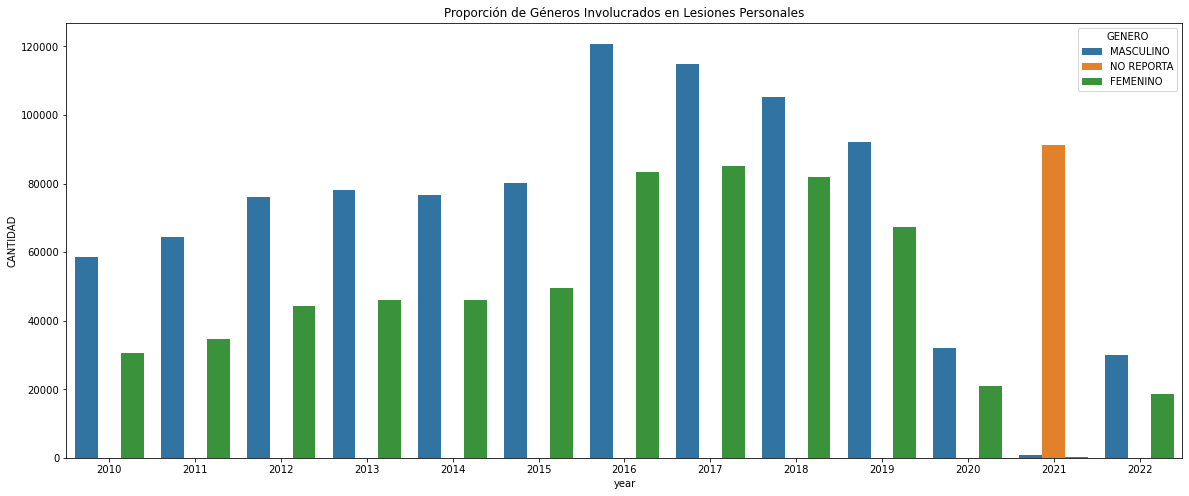

In [102]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(ax = ax, data = ls_genero, x='year', y='CANTIDAD', hue ='GENERO')
plt.title('Proporción de Géneros Involucrados en Lesiones Personales')

In [103]:
#Creacion de nueva variable conteniendo grupo etario, año y creacion de grafica
ls_grupoetario = ls_df.groupby(['GRUPO ETARIO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ls_grupoetario = ls_grupoetario.reset_index()
ls_grupoetario.sort_values(by = 'year')

,GRUPO ETARIO,year,CANTIDAD
22,ADOLESCENTES,2010,7165
33,MENORES,2010,3378
10,ADULTOS,2010,78602
21,ADOLESCENTES,2011,8273
9,ADULTOS,2011,87425
32,MENORES,2011,3451
19,ADOLESCENTES,2012,9239
31,MENORES,2012,3567
45,NO REPORTA,2012,2
7,ADULTOS,2012,107503


Text(0.5, 1.0, 'Proporción de Grupos Etarios Involucrados en Lesiones Personales')

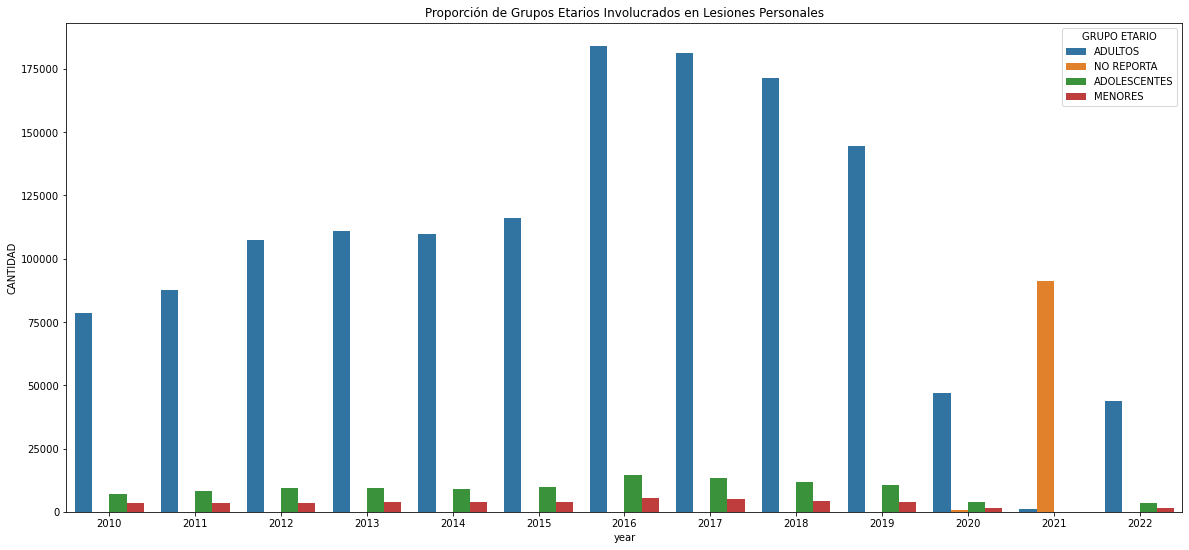

In [104]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = ls_grupoetario, x='year', y='CANTIDAD', hue ='GRUPO ETARIO')
plt.title('Proporción de Grupos Etarios Involucrados en Lesiones Personales')

Data Frame Violencia Intrafamiliar:

In [105]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
vi_genero = vi_df.groupby(['GENERO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
vi_genero = vi_genero.reset_index()
vi_genero.sort_values(by = 'year')

,GENERO,year,CANTIDAD
25,MASCULINO,2010,4049
15,FEMENINO,2010,19098
34,NO REPORTA,2010,24
32,NO REPORTA,2011,26
24,MASCULINO,2011,4736
13,FEMENINO,2011,22432
33,NO REPORTA,2012,25
11,FEMENINO,2012,26473
23,MASCULINO,2012,5919
22,MASCULINO,2013,6120


Text(0.5, 1.0, 'Proporción de Géneros Involucrados en Violencia Intrafamilia')

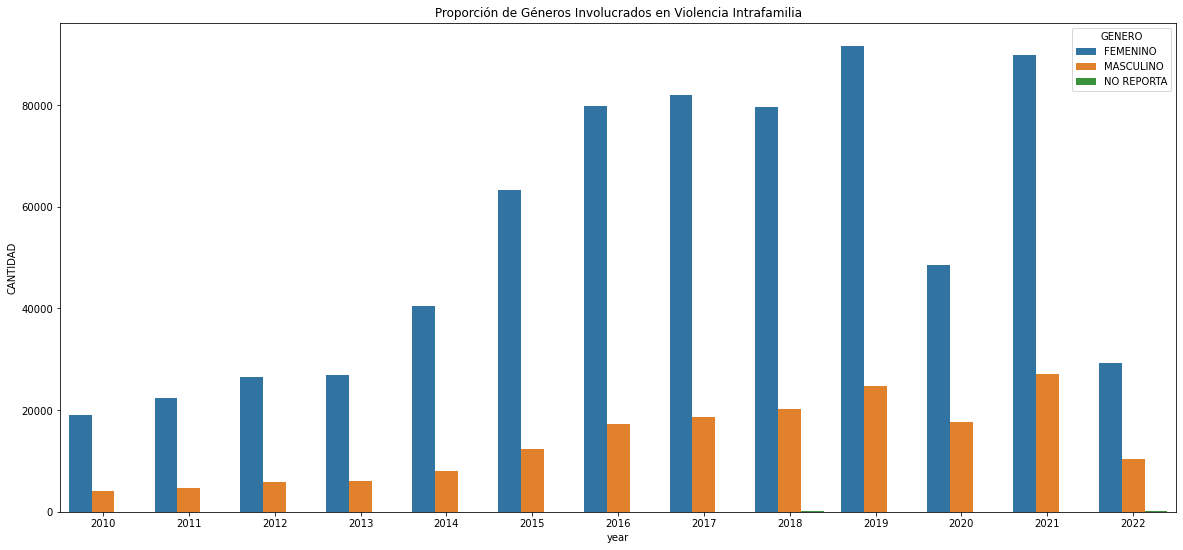

In [106]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = vi_genero, x='year', y='CANTIDAD', hue ='GENERO')
plt.title('Proporción de Géneros Involucrados en Violencia Intrafamilia')

In [107]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
vi_grupoetario = vi_df.groupby(['GRUPO ETARIO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
vi_grupoetario = vi_grupoetario.reset_index()
vi_grupoetario.sort_values(by = 'year')

,GRUPO ETARIO,year,CANTIDAD
48,NO REPORTA,2010,18
35,ADOLESCENTES,2010,1088
39,MENORES,2010,588
12,ADULTOS,2010,21477
11,ADULTOS,2011,25345
47,NO REPORTA,2011,21
33,ADOLESCENTES,2011,1192
38,MENORES,2011,636
36,MENORES,2012,778
10,ADULTOS,2012,30114


Text(0.5, 1.0, 'Proporción de Grupos Etarios Involucrados en Violencia Intrafamiliar')

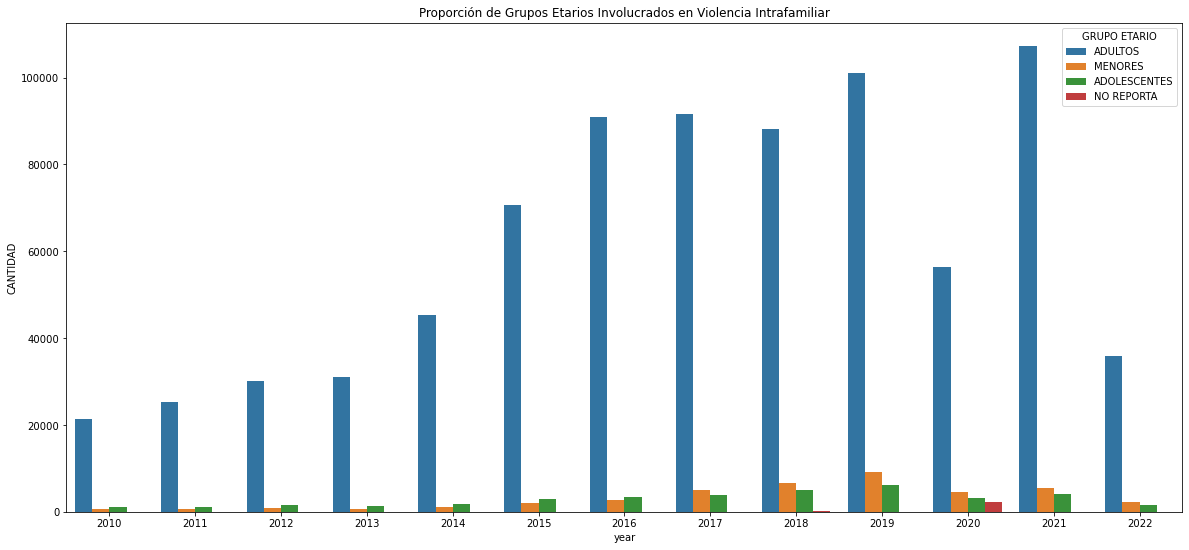

In [108]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = vi_grupoetario, x='year', y='CANTIDAD', hue ='GRUPO ETARIO')
plt.title('Proporción de Grupos Etarios Involucrados en Violencia Intrafamiliar')

Data Frame Delitos Sexuales

In [109]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
ds_genero = ds_df.groupby(['GENERO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ds_genero = ds_genero.reset_index()
ds_genero.sort_values(by = 'year')

,GENERO,year,CANTIDAD
34,NO REPORTA,2010,24
25,MASCULINO,2010,891
12,FEMENINO,2010,5581
24,MASCULINO,2011,1140
33,NO REPORTA,2011,31
11,FEMENINO,2011,6556
21,MASCULINO,2012,1626
30,NO REPORTA,2012,54
9,FEMENINO,2012,9173
32,NO REPORTA,2013,36


Text(0.5, 1.0, 'Proporción de Géneros Involucrados en Delitos Sexuales')

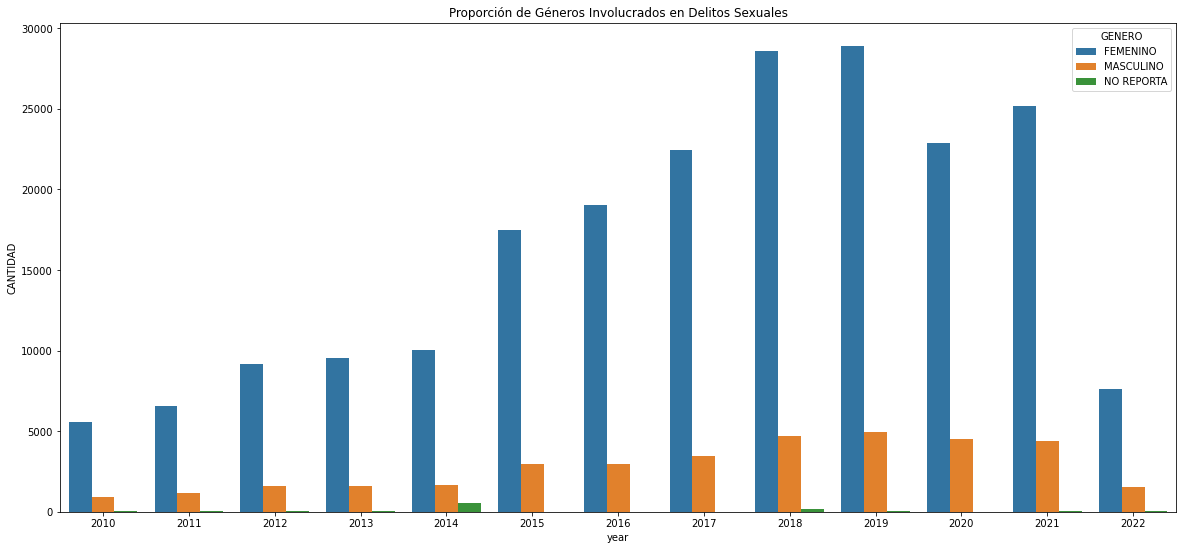

In [110]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = ds_genero, x='year', y='CANTIDAD', hue ='GENERO')
plt.title('Proporción de Géneros Involucrados en Delitos Sexuales')

In [111]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
ds_grupoetario = ds_df.groupby(['GRUPO ETARIO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ds_grupoetario = ds_grupoetario.reset_index()
ds_grupoetario.sort_values(by = 'year')

,GRUPO ETARIO,year,CANTIDAD
26,MENORES,2010,3331
38,ADOLESCENTES,2010,1209
36,ADULTOS,2010,1956
22,MENORES,2011,4061
37,ADOLESCENTES,2011,1492
35,ADULTOS,2011,2174
28,ADULTOS,2012,3189
34,ADOLESCENTES,2012,2181
19,MENORES,2012,5483
16,MENORES,2013,5874


Text(0.5, 1.0, 'Proporción de Grupos Etarios Involucrados en Delitos Sexuales')

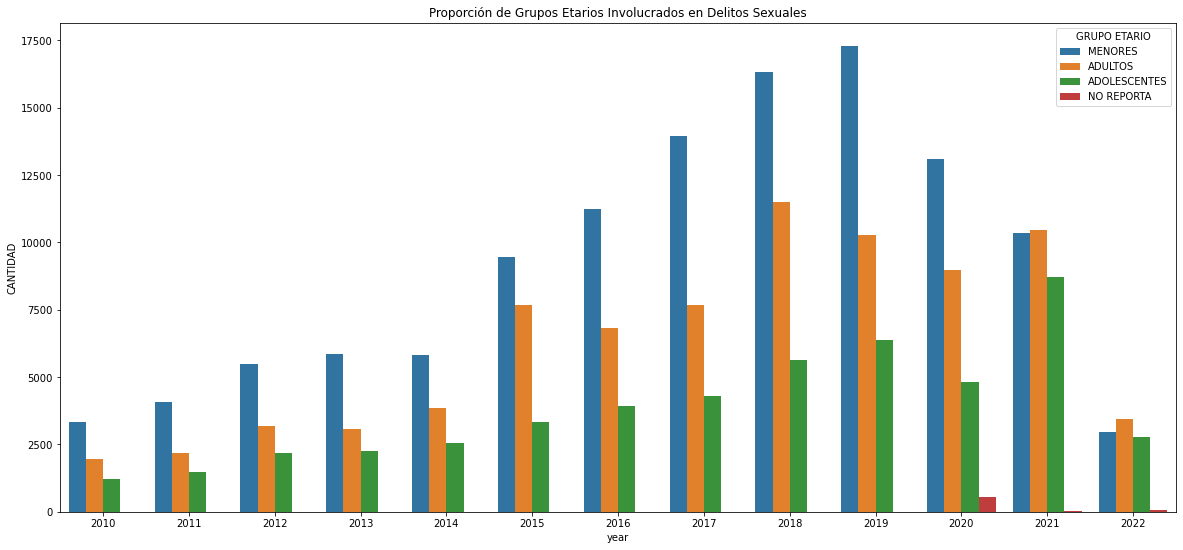

In [112]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = ds_grupoetario, x='year', y='CANTIDAD', hue ='GRUPO ETARIO')
plt.title('Proporción de Grupos Etarios Involucrados en Delitos Sexuales')

Data Frame Homicidios Accidente Transito

In [113]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
hat_genero = hat_df.groupby(['GENERO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
hat_genero = hat_genero.reset_index()
hat_genero.sort_values(by = 'year')

,GENERO,year,CANTIDAD
31,NO REPORTA,2010,4
10,MASCULINO,2010,3570
21,FEMENINO,2010,926
29,NO REPORTA,2011,5
11,MASCULINO,2011,3387
23,FEMENINO,2011,903
9,MASCULINO,2012,3647
24,FEMENINO,2012,902
20,FEMENINO,2013,983
28,NO REPORTA,2013,7


Text(0.5, 1.0, 'Proporción de Géneros Involucrados en Homicidios por Accidente de Tráfico')

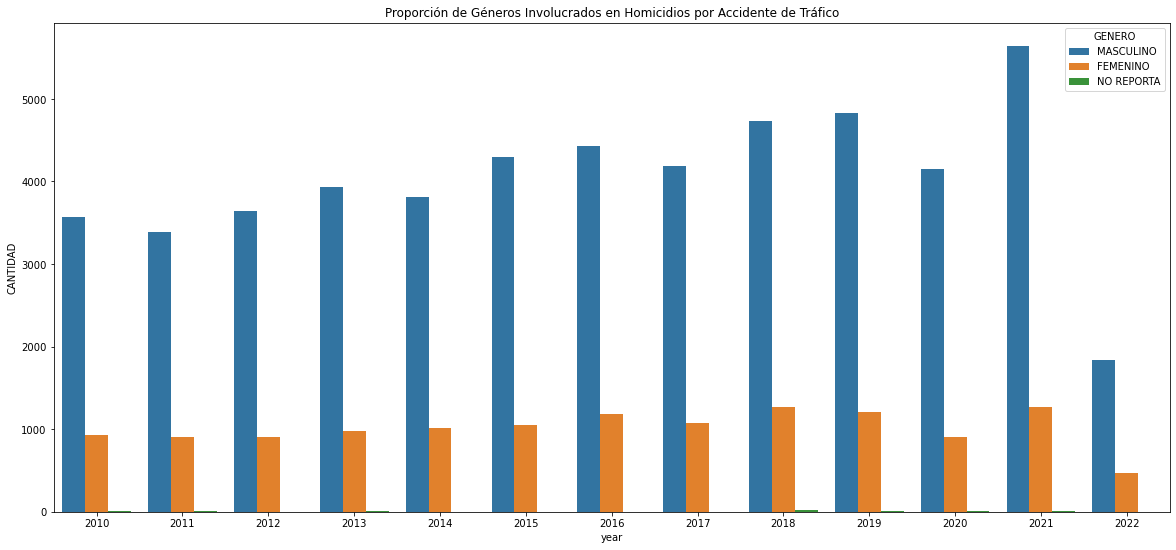

In [114]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = hat_genero, x='year', y='CANTIDAD', hue ='GENERO')
plt.title('Proporción de Géneros Involucrados en Homicidios por Accidente de Tráfico')

In [115]:
#Creacion de nueva variable conteniendo genero, año y creacion de grafica
hat_grupoetario = hat_df.groupby(['GRUPO ETARIO', 'year']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
hat_grupoetario = hat_grupoetario.reset_index()
hat_grupoetario.sort_values(by = 'year')

,GRUPO ETARIO,year,CANTIDAD
28,ADOLESCENTES,2010,190
22,MENORES,2010,216
10,ADULTOS,2010,4094
23,MENORES,2011,216
26,ADOLESCENTES,2011,210
11,ADULTOS,2011,3869
30,MENORES,2012,185
9,ADULTOS,2012,4150
25,ADOLESCENTES,2012,214
24,MENORES,2013,215


Text(0.5, 1.0, 'Proporción de Grupos Etarios Involucrados en Homicidios por Accidente de Tráfico')

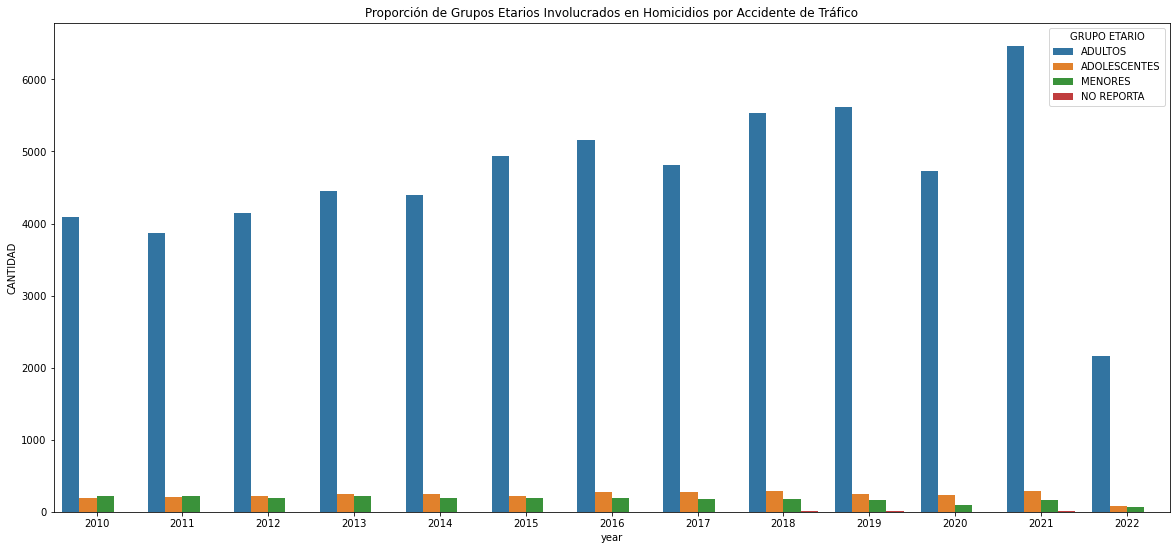

In [116]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = hat_grupoetario, x='year', y='CANTIDAD', hue ='GRUPO ETARIO')
plt.title('Proporción de Grupos Etarios Involucrados en Homicidios por Accidente de Tráfico')

##2.4 ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

R/ Parece haber una tendencia en que estos tipos de delitos tienen su pico en el primer trimestre del año, aunque no es una diferencia muy grande comparado con los demas meses. 

Otro tema particular identificado es relacionado con los Homicidios por Accidente Transito, los cuales aparte de tener una mayor incidencia en la primera parte del año presentan un incremento en el mes de Diciembre siendo uno de sus meses mas altos. (Puede que este incremento se este dando por las fiestas de fin de año.

In [117]:
#Creacion de nueva variable especificando cantidad de delitos por mes
ls_mes = ls_df.groupby(['month']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ls_mes = ls_mes.reset_index()
ls_mes.sort_values(by = 'month')

,month,CANTIDAD
1,1,151211
2,2,143855
0,3,153994
3,4,137825
4,5,134986
8,6,131154
5,7,134172
6,8,133310
7,9,131905
9,10,128501


Text(0.5, 1.0, 'Cantidad de Delitos de Lesiones Personales Mes a Mes')

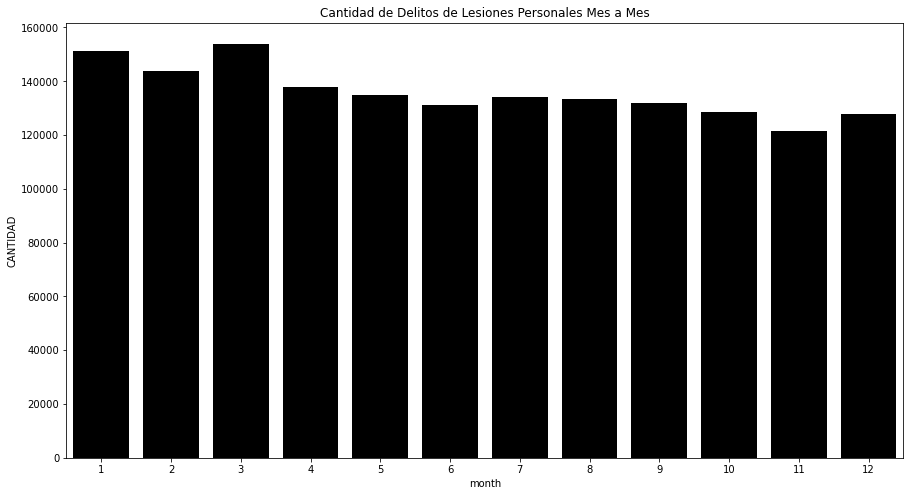

In [118]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(ax = ax, data = ls_mes, x='month', y='CANTIDAD', color = 'black')
plt.title('Cantidad de Delitos de Lesiones Personales Mes a Mes')

In [119]:
vi_mes = vi_df.groupby(['month']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
vi_mes = vi_mes.reset_index()
vi_mes.sort_values(by = 'month')

,month,CANTIDAD
2,1,78519
1,2,82599
0,3,84883
4,4,76221
5,5,75897
9,6,68909
7,7,70940
6,8,73490
3,9,76300
8,10,69302


Text(0.5, 1.0, 'Cantidad de Delitos de Violencia Intrafamiliar Mes a Mes')

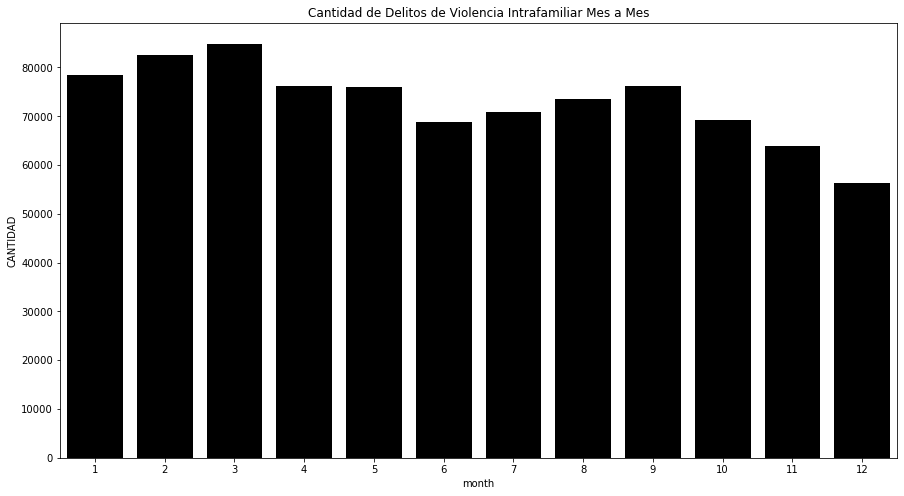

In [120]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(ax = ax, data = vi_mes, x='month', y='CANTIDAD', color = 'black')
plt.title('Cantidad de Delitos de Violencia Intrafamiliar Mes a Mes')

In [121]:
ds_mes = ds_df.groupby(['month']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
ds_mes = ds_mes.reset_index()
ds_mes.sort_values(by = 'month')

,month,CANTIDAD
1,1,22965
2,2,22794
0,3,24109
4,4,21533
5,5,21524
9,6,19657
7,7,20644
3,8,21788
6,9,21434
8,10,20594


Text(0.5, 1.0, 'Cantidad de Delitos Sexuales Mes a Mes')

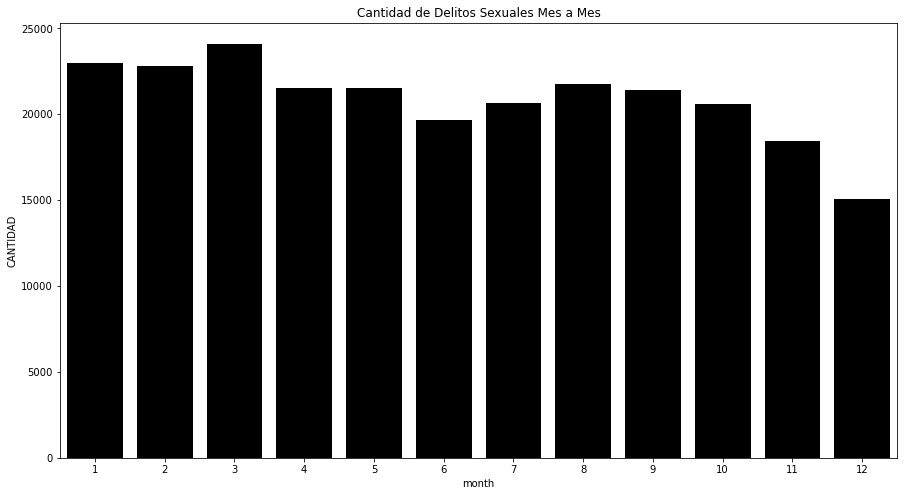

In [122]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(ax = ax, data = ds_mes, x='month', y='CANTIDAD', color = 'black')
plt.title('Cantidad de Delitos Sexuales Mes a Mes')

In [123]:
hat_mes = hat_df.groupby(['month']).sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
hat_mes = hat_mes.reset_index()
hat_mes.sort_values(by = 'month')

,month,CANTIDAD
1,1,6068
4,2,5505
2,3,5908
7,4,5250
11,5,4996
9,6,5206
5,7,5335
10,8,5193
8,9,5235
3,10,5582


Text(0.5, 1.0, 'Cantidad de Homicidios por Accidente de Tráfico Mes a Mes')

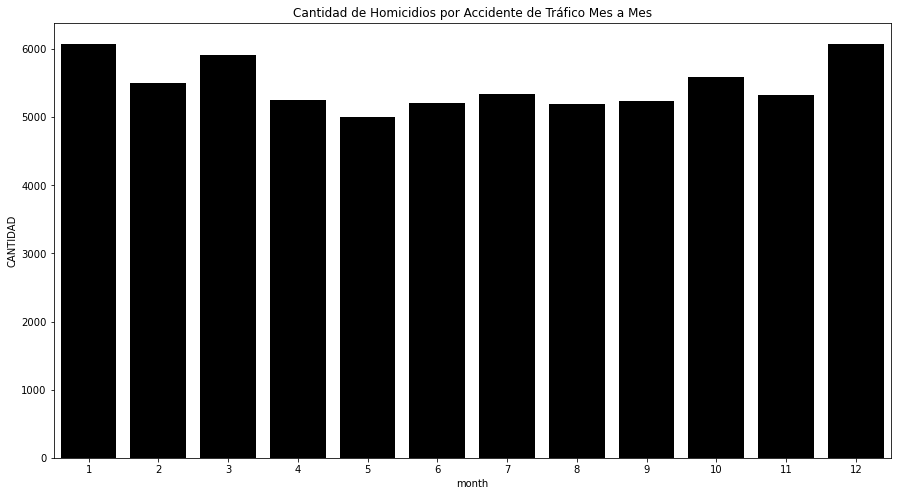

In [124]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(ax = ax, data = hat_mes, x='month', y='CANTIDAD', color = 'black')
plt.title('Cantidad de Homicidios por Accidente de Tráfico Mes a Mes')

##2.5 Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

R/ ependiendo de los delitos se tienen las siguientes descripciones principales:
* Lesiones Personales
* Actos Sexuales con menores de 14 años
* Homicidio Culposo en accidente de transito

In [125]:
ls_df.groupby('DESCRIPCIÓN CONDUCTA').sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
#['DESCRIPCIÓN CONDUCTA'].unique()

DESCRIPCIÓN CONDUCTA
LESIONES PERSONALES                               1147947
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )     482407
Name: CANTIDAD, dtype: int64

In [126]:
ds_df.groupby('delito').sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
#ds_df['delito'].unique()

delito
ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                  81928
ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS                                                           56410
ARTÍCULO 205. ACCESO CARNAL VIOLENTO                                                                               39062
ARTÍCULO 206. ACTO SEXUAL VIOLENTO                                                                                 27018
ARTÍCULO 210 A. ACOSO SEXUAL                                                                                       16469
ARTÍCULO 210. ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR                                           9696
ARTÍCULO 218. PORNOGRAFÍA CON MENORES                                                                               6682
ARTÍCULO 207. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR                              4458
ARTÍCULO 219 A. UTILIZACI

In [127]:
hat_df.groupby('DESCRIPCIÓN CONDUCTA').sum().sort_values(by = 'CANTIDAD', ascending = False)['CANTIDAD']
#hat_df['DESCRIPCIÓN CONDUCTA'].unique()

DESCRIPCIÓN CONDUCTA
ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)        65662
ARTÍCULO 110. HOMICIDIO CULPOSO ( CIRCUNSTANCIAS DE AGRAVACIÓN)       11
Name: CANTIDAD, dtype: int64

#Punto 3

A partir de alguno de los conjuntos de datos seleccionados, visualice una
serie de tiempo por año y mes que permita comparar la cantidad de delitos
cometidos para los departamentos con mayor ocurrencia durante los últimos 5
años. Para que los resultados entre departamentos sean comparables, es
importante que normalice las cantidades obtenidas por cantidad de habitantes.
En este archivo puede encontrar la población por departamento para el año
2018. Asuma que la población no ha cambiado con el paso de los años.

In [128]:
poblacion_df.head()

,departamento,población
0,Amazonas,48.144
1,Antioquia,2.427.129
2,Arauca,85.585
3,Atlántico,1.206.319
4,Bolívar,973.045


In [129]:
poblacion_df["departamento"] = poblacion_df["departamento"].replace("VALLE DEL CAUCA","VALLE")

In [130]:
#Validar y transformar datos población
poblacion_df['departamento'].unique()
poblacion_df['departamento'] = poblacion_df['departamento'].str.upper()
poblacion_df.loc[~poblacion_df["departamento"].isin(departments_list), "departamento"].unique()
poblacion_df["departamento"] = poblacion_df["departamento"].replace("VALLE DEL CAUCA","VALLE")
poblacion_df.replace({"departamento":estandarizar_dep}, inplace = True)
poblacion_df.loc[~poblacion_df["departamento"].isin(departments_list), "departamento"].unique()

array([], dtype=object)

In [131]:
#Cantidad de delitos agrupado por departamento, año y mes 

ds_df.groupby(['year','month','DEPARTAMENTO'], as_index=True).sum().sort_values('CANTIDAD',ascending = False)
delitosex_df21 = ds_df[["DEPARTAMENTO","year","month","CANTIDAD"]].groupby(['DEPARTAMENTO','year','month'], as_index=False).sum().sort_values(by=['year','month'],ascending = False)
delitosex_df21.loc[delitosex_df21['year'] > 2017]

,DEPARTAMENTO,year,month,CANTIDAD
147,AMAZONAS,2022,4,3
295,ANTIOQUIA,2022,4,207
443,ARAUCA,2022,4,9
591,ATLÁNTICO,2022,4,58
739,BOLÍVAR,2022,4,61
...,...,...,...,...
3998,SUCRE,2018,1,50
4146,TOLIMA,2018,1,133
4294,VALLE,2018,1,225
4379,VAUPÉS,2018,1,4


In [132]:
#cantidad de delitos por departamento
#departamentos con mayor ocurrencia durante los últimos 5 años: Cundinamarca, Antioquia, Valle
delitosex_dpto_df = delitosex_df21.loc[delitosex_df21['year'] > 2017]
delitosex_dpto_df

#merge con población de los departamentos del dataset de delitos sexuales y población
delito_per_capita_df = pd.merge(delitosex_dpto_df, poblacion_df, left_on = "DEPARTAMENTO", right_on = "departamento")
delito_per_capita_df['población'] = delito_per_capita_df['población'].str.replace('.', '').astype(int)
delito_per_capita_df

#Homicidios per capita 
delito_per_capita_df['per capita'] = delito_per_capita_df['CANTIDAD'] / delito_per_capita_df['población'] * 100000
delito_per_capita_df.head(10)

C:\Users\Nicolas Rey\AppData\Local\Temp\ipykernel_11296\250942228.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  delito_per_capita_df['población'] = delito_per_capita_df['población'].str.replace('.', '').astype(int)


,DEPARTAMENTO,year,month,CANTIDAD,departamento,población,per capita
0,AMAZONAS,2022,4,3,AMAZONAS,48144,6.231306
1,AMAZONAS,2022,3,2,AMAZONAS,48144,4.154204
2,AMAZONAS,2022,2,4,AMAZONAS,48144,8.308408
3,AMAZONAS,2022,1,5,AMAZONAS,48144,10.385510
4,AMAZONAS,2021,12,3,AMAZONAS,48144,6.231306
5,AMAZONAS,2021,11,3,AMAZONAS,48144,6.231306
6,AMAZONAS,2021,10,6,AMAZONAS,48144,12.462612
7,AMAZONAS,2021,9,4,AMAZONAS,48144,8.308408
8,AMAZONAS,2021,8,6,AMAZONAS,48144,12.462612
9,AMAZONAS,2021,7,2,AMAZONAS,48144,4.154204


Text(0.5, 1.0, 'Cantidad de Delitos Sexuales por Departamento en los Últimos 5 años')

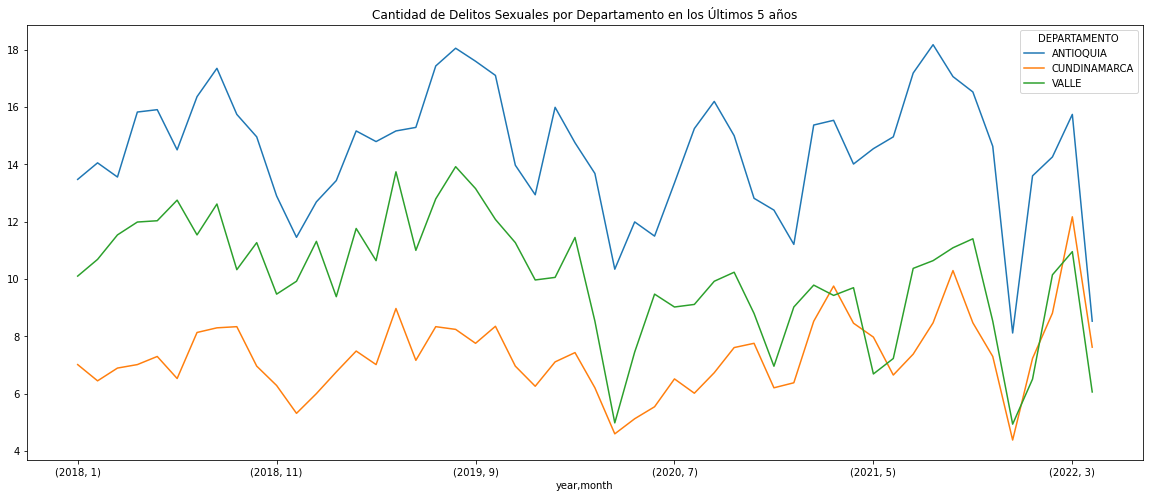

In [133]:
#Visualización de los delitos por departamento con mayor ocurrencia durante los últimos 5 años: Cundinamarca, Antioquia, Valle
delito_per_capita_filtro_df = delito_per_capita_df.loc[(delito_per_capita_df['DEPARTAMENTO'] == 'CUNDINAMARCA') | (delito_per_capita_df['DEPARTAMENTO'] == 'ANTIOQUIA') | (delito_per_capita_df['DEPARTAMENTO'] == 'VALLE')]


delito_per_capita_filtro_df.set_index(['year', 'month'])
pivoted = delito_per_capita_filtro_df.pivot(index=['year', 'month'], columns="DEPARTAMENTO", values="per capita")
pivoted.plot(figsize=(20, 8))
plt.title('Cantidad de Delitos Sexuales por Departamento en los Últimos 5 años')

#Punto 4

A partir de los conjuntos de datos seleccionados, construya un único dataset que integre la totalidad de los delitos ocurridos por departamento y municipio. Muestre los valores normalizados por cantidad de habitantes realizando un proceso similar al del punto anterior. En este archivo puede encontrar proyecciones anuales de las poblaciones por departamento. Utilice la proyección para el año en curso. Considere solamente los municipios con más de 1 millón de habitantes.

In [134]:
#Identifying which is the original DataFrame:
#1 - lesiones_personales 2 - violencia intrafamiliar 3 - delitos sexuales 4 - homicidios
ls_df['df_original']  = '1'
vi_df['df_original']  = '2'
ds_df['df_original']  = '3'
hat_df['df_original'] = '4'

In [135]:
#Creating a new df in order to not pass the description column present in some original df
ls_df_2  = ls_df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]]
vi_df_2  = vi_df.iloc[:,:]
vi_df_2  = vi_df_2.reset_index(drop=True)
ds_df_2  = ds_df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]
ds_df_2  = ds_df_2.reset_index(drop=True)
hat_df_2 = hat_df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]]
hat_df_2 = hat_df_2.reset_index(drop=True)

In [136]:
#Creating the new df with all the original dfs
del_df = pd.concat([ls_df_2, vi_df_2,ds_df_2,hat_df_2], axis=0)

In [137]:
del_df.count()

DEPARTAMENTO    1779859
MUNICIPIO       1779859
CODIGO DANE     1779859
ARMAS MEDIOS    1779859
FECHA HECHO     1779859
GENERO          1779859
GRUPO ETARIO    1779859
CANTIDAD        1779859
year            1779859
month           1779859
df_original     1779859
dtype: int64

In [138]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779859 entries, 0 to 59804
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   DEPARTAMENTO  object        
 1   MUNICIPIO     object        
 2   CODIGO DANE   object        
 3   ARMAS MEDIOS  object        
 4   FECHA HECHO   datetime64[ns]
 5   GENERO        object        
 6   GRUPO ETARIO  object        
 7   CANTIDAD      int64         
 8   year          int64         
 9   month         int64         
 10  df_original   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 163.0+ MB


In [139]:
del_df.isnull().any()

DEPARTAMENTO    False
MUNICIPIO       False
CODIGO DANE     False
ARMAS MEDIOS    False
FECHA HECHO     False
GENERO          False
GRUPO ETARIO    False
CANTIDAD        False
year            False
month           False
df_original     False
dtype: bool

In [140]:
#Filtering del_22_df by year = 2022
del_22_df = del_df[(del_df['year'] == 2022)]
del_22_df.count()

DEPARTAMENTO    58058
MUNICIPIO       58058
CODIGO DANE     58058
ARMAS MEDIOS    58058
FECHA HECHO     58058
GENERO          58058
GRUPO ETARIO    58058
CANTIDAD        58058
year            58058
month           58058
df_original     58058
dtype: int64

In [141]:
#Grouping by DEPARTAMENTO Y MUNICIPIO
del_dp_mn_df = del_22_df.groupby(['DEPARTAMENTO','MUNICIPIO'], as_index=False).CANTIDAD.sum().sort_values('DEPARTAMENTO')
del_dp_mn_df

,DEPARTAMENTO,MUNICIPIO,CANTIDAD
0,AMAZONAS,LETICIA (CT),86
1,AMAZONAS,PUERTO NARIÑO,3
91,ANTIOQUIA,SAN JERÓNIMO,22
90,ANTIOQUIA,SAN FRANCISCO,1
89,ANTIOQUIA,SAN CARLOS,13
...,...,...,...
1054,VAUPÉS,TARAIRA,1
1057,VICHADA,PUERTO CARREÑO (CT),25
1055,VICHADA,CUMARIBO,6
1056,VICHADA,LA PRIMAVERA,25


In [142]:
proy_pob_all_df.head()

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Total
0,5,Antioquia,5001,Medellín,2018,Cabecera Municipal,2382399
1,5,Antioquia,5001,Medellín,2018,Centros Poblados y Rural Disperso,44730
2,5,Antioquia,5001,Medellín,2018,Total,2427129
3,5,Antioquia,5001,Medellín,2019,Cabecera Municipal,2439470
4,5,Antioquia,5001,Medellín,2019,Centros Poblados y Rural Disperso,44075


In [143]:
# Changing the column name AÑO Y ÁREA GEOGRÁFICA
proy_pob_all_df.rename(columns={'AÑO':'ANIO','ÁREA GEOGRÁFICA':'AREA GEOGRAFICA'}, inplace=True)
proy_pob_all_df

,DP,DPNOM,DPMP,MPIO,ANIO,AREA GEOGRAFICA,Total
0,5,Antioquia,5001,Medellín,2018,Cabecera Municipal,2382399
1,5,Antioquia,5001,Medellín,2018,Centros Poblados y Rural Disperso,44730
2,5,Antioquia,5001,Medellín,2018,Total,2427129
3,5,Antioquia,5001,Medellín,2019,Cabecera Municipal,2439470
4,5,Antioquia,5001,Medellín,2019,Centros Poblados y Rural Disperso,44075
...,...,...,...,...,...,...,...
60583,99,Vichada,99773,Cumaribo,2034,Centros Poblados y Rural Disperso,93327
60584,99,Vichada,99773,Cumaribo,2034,Total,96319
60585,99,Vichada,99773,Cumaribo,2035,Cabecera Municipal,3001
60586,99,Vichada,99773,Cumaribo,2035,Centros Poblados y Rural Disperso,94793


In [144]:
#Filtering proy_pob_df by ANIO = 2022, AREA GEOGRAFICA = Total and Total >= 1.000.000
proy_pob_df = proy_pob_all_df[(proy_pob_all_df['ANIO'] == 2022) & (proy_pob_all_df['AREA GEOGRAFICA'] == 'Total') & (proy_pob_all_df['Total'] >= 1000000)]
proy_pob_df

,DP,DPNOM,DPMP,MPIO,ANIO,AREA GEOGRAFICA,Total
14,5,Antioquia,5001,Medellín,2022,Total,2612958
6764,8,Atlántico,8001,Barranquilla,2022,Total,1312473
8006,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2022,Total,7901653
8060,13,Bolívar,13001,Cartagena de Indias,2022,Total,1055035
54284,76,Valle del Cauca,76001,Cali,2022,Total,2280907


In [145]:
#Replacing departamentos wrong writed.
proy_pob_df.replace({"DPNOM":estandarizar_dep}, inplace = True)

C:\Users\Nicolas Rey\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [146]:
#Replacing municipios wrong writed.
proy_pob_df.replace({"MPIO":estandarizar_mun}, inplace = True)

In [147]:
proy_pob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 14 to 54284
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DP               5 non-null      int64 
 1   DPNOM            5 non-null      object
 2   DPMP             5 non-null      int64 
 3   MPIO             5 non-null      object
 4   ANIO             5 non-null      int64 
 5   AREA GEOGRAFICA  5 non-null      object
 6   Total            5 non-null      int64 
dtypes: int64(4), object(3)
memory usage: 320.0+ bytes


In [148]:
#Merging del_dp_mn_df delitos por Departamento y Municipio con su población 
del_pry_df = pd.merge(del_dp_mn_df, proy_pob_df, left_on = ['DEPARTAMENTO','MUNICIPIO'], right_on = ['DPNOM','MPIO'])
del_pry_df

,DEPARTAMENTO,MUNICIPIO,CANTIDAD,DP,DPNOM,DPMP,MPIO,ANIO,AREA GEOGRAFICA,Total
0,ANTIOQUIA,MEDELLÍN (CT),5656,5,ANTIOQUIA,5001,MEDELLÍN (CT),2022,Total,2612958
1,ATLÁNTICO,BARRANQUILLA (CT),2192,8,ATLÁNTICO,8001,BARRANQUILLA (CT),2022,Total,1312473
2,BOLÍVAR,CARTAGENA (CT),2718,13,BOLÍVAR,13001,CARTAGENA (CT),2022,Total,1055035
3,CUNDINAMARCA,BOGOTÁ D.C. (CT),22562,11,CUNDINAMARCA,11001,BOGOTÁ D.C. (CT),2022,Total,7901653


In [149]:
del_pry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DEPARTAMENTO     4 non-null      object
 1   MUNICIPIO        4 non-null      object
 2   CANTIDAD         4 non-null      int64 
 3   DP               4 non-null      int64 
 4   DPNOM            4 non-null      object
 5   DPMP             4 non-null      int64 
 6   MPIO             4 non-null      object
 7   ANIO             4 non-null      int64 
 8   AREA GEOGRAFICA  4 non-null      object
 9   Total            4 non-null      int64 
dtypes: int64(5), object(5)
memory usage: 352.0+ bytes


In [150]:
#Calculating delitos per capita
del_pry_df['per_cap'] = del_pry_df['CANTIDAD']/del_pry_df['Total'] 
del_pry_df['per_cap_mult'] = del_pry_df['per_cap']*100000
del_pry_df.iloc[:,[7,0,1,2,9,10,11]]

,ANIO,DEPARTAMENTO,MUNICIPIO,CANTIDAD,Total,per_cap,per_cap_mult
0,2022,ANTIOQUIA,MEDELLÍN (CT),5656,2612958,0.002165,216.459660
1,2022,ATLÁNTICO,BARRANQUILLA (CT),2192,1312473,0.001670,167.012960
2,2022,BOLÍVAR,CARTAGENA (CT),2718,1055035,0.002576,257.621785
3,2022,CUNDINAMARCA,BOGOTÁ D.C. (CT),22562,7901653,0.002855,285.535191


R/ En seguida los valores percapita de delitos en los municipios con población mayor o igual a 1'000.000 de habitantes para los delitos registrados en lo corrido del año 2022: 
* En el municipio de MEDELLÍN (CT), por cada 216 habitantes se presenta un delito.
* En el municipio de BARRANQUILLA (CT), por cada 167 habitantes se presenta un delito.
* En el municipio de CARTAGENA (CT), por cada 257 habitantes se presenta un delito.
* En el municipio de BARRANQUILLA (CT), por cada 285 habitantes se presenta un delito.

Text(0.5, 1.0, 'Delitos Per-Capita')

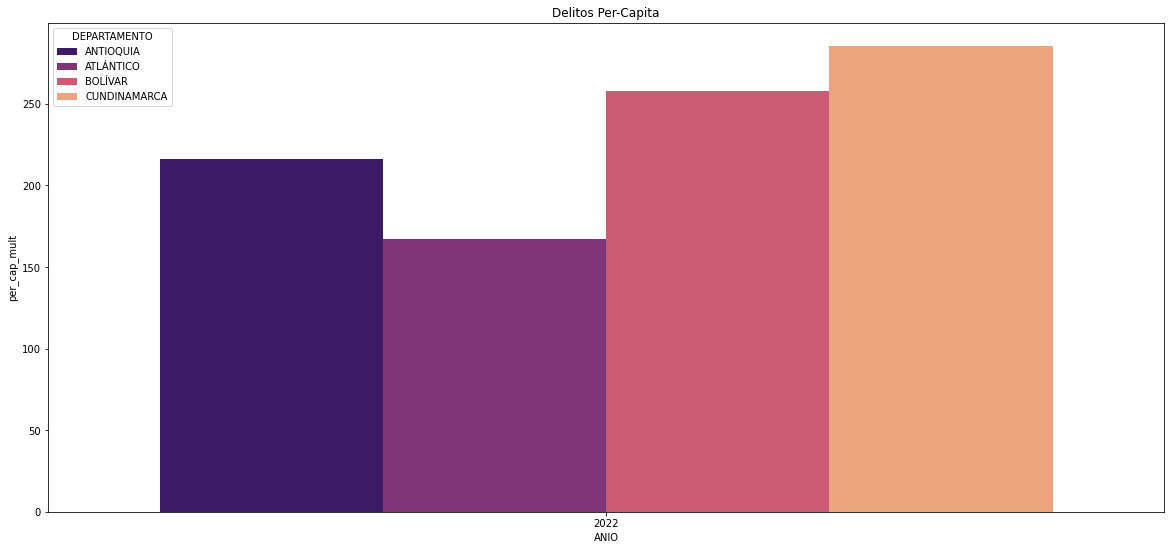

In [151]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(ax = ax, data = del_pry_df, x='ANIO', y='per_cap_mult', hue ='DEPARTAMENTO', palette = 'magma')
plt.title('Delitos Per-Capita')